In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf
import numpy as np
import time
from sklearn.preprocessing import OneHotEncoder

In [ ]:
!gdown 14ONcivH0rmAv0HdeyiQJkizlBUgfNJYQ

Downloading...
From: https://drive.google.com/uc?id=14ONcivH0rmAv0HdeyiQJkizlBUgfNJYQ
To: /content/prediksiemasref.csv
100% 1.01M/1.01M [00:00<00:00, 9.38MB/s]


In [ ]:
import pandas as pd
data = pd.read_csv('prediksiemasref.csv')
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume,SP_open,SP_high,SP_low,...,GDX_Close,GDX_Adj Close,GDX_Volume,USO_Open,USO_High,USO_Low,USO_Close,USO_Adj Close,USO_Volume,target
0,15/12/11,154.740005,154.949997,151.710007,152.330002,152.330002,21521900,123.029999,123.199997,121.989998,...,51.680000,48.973877,20605600,36.900002,36.939999,36.049999,36.130001,36.130001,12616700,rendah
1,16/12/11,154.309998,155.369995,153.899994,155.229996,155.229996,18124300,122.230003,122.949997,121.300003,...,52.680000,49.921513,16285400,36.180000,36.500000,35.730000,36.270000,36.270000,12578800,rendah
2,19/12/11,155.479996,155.860001,154.360001,154.869995,154.869995,12547200,122.059998,122.320000,120.029999,...,51.169998,48.490578,15120200,36.389999,36.450001,35.930000,36.200001,36.200001,7418200,rendah
3,20/12/11,156.820007,157.429993,156.580002,156.979996,156.979996,9136300,122.180000,124.139999,120.370003,...,52.990002,50.215282,11644900,37.299999,37.610001,37.220001,37.560001,37.560001,10041600,rendah
4,21/12/11,156.979996,157.529999,156.130005,157.160004,157.160004,11996100,123.930000,124.360001,122.750000,...,52.959999,50.186852,8724300,37.669998,38.240002,37.520000,38.110001,38.110001,10728000,rendah


In [ ]:
import pandas as pd
import numpy as np

selected_columns = ["Date", "Open", "High", "Low", "Close", 'target']
d_selected = data[selected_columns]
d_selected['target'] = d_selected['Close']
output_file_path = '/content/prediksiemasref.csv'
d_selected.to_csv(output_file_path, index=False)
print(d_selected)


          Date        Open        High         Low       Close      target
0     15/12/11  154.740005  154.949997  151.710007  152.330002  152.330002
1     16/12/11  154.309998  155.369995  153.899994  155.229996  155.229996
2     19/12/11  155.479996  155.860001  154.360001  154.869995  154.869995
3     20/12/11  156.820007  157.429993  156.580002  156.979996  156.979996
4     21/12/11  156.979996  157.529999  156.130005  157.160004  157.160004
...        ...         ...         ...         ...         ...         ...
1713  24/12/18  119.570000  120.139999  119.570000  120.019997  120.019997
1714  26/12/18  120.620003  121.000000  119.570000  119.660004  119.660004
1715  27/12/18  120.570000  120.900002  120.139999  120.570000  120.570000
1716  28/12/18  120.800003  121.080002  120.720001  121.059998  121.059998
1717  31/12/18  120.980003  121.260002  120.830002  121.250000  121.250000

[1718 rows x 6 columns]


<ipython-input-211-341023ff167f>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d_selected['target'] = d_selected['Close']


**Fungsi Aktivasi Sigmoid**

In [ ]:
def sig(x):
    return 1 / (1 + np.exp(-x))

def sigd(x):
    return sigmoid(x) * (1 - sigmoid(x))

**Feedforward**

In [ ]:
import numpy as np
def bp_fit(X, target, layer_conf, max_epoch, max_error=0.1,
learn_rate=.1, print_per_epoch=100):
    np.random.seed(1)

    # Inisialisasi variabel dan bobot secara acak
    nin = [np.empty(i) for i in layer_conf]
    n = [np.empty(j + 1) if i < len(layer_conf) - 1
    else np.empty(j) for i, j in enumerate(layer_conf)]
    w = np.array([np.random.rand(layer_conf[i] + 1,
    layer_conf[i + 1]) for i in range(len(layer_conf) -
    1)])
    dw = [np.empty((layer_conf[i] + 1, layer_conf[i +
    1])) for i in range(len(layer_conf) - 1)]
    d = [np.empty(s) for s in layer_conf[1:]]
    din = [np.empty(s) for s in layer_conf[1:-1]]
    epoch = 0
    mse = 1

    # Set bias di lapisan input
    for i in range(0, len(n)-1):
        n[i][-1] = 1

    # Loop pelatihan
    while (max_epoch == -1 or epoch < max_epoch) and mse > max_error:
      epoch += 1
      mse = 0

      # Loop setiap sampel pada data pelatihan
      for r in range(len(X)):
          n[0][:-1] = X[r]

          # Feedforward
          for L in range(1, len(layer_conf)):
              nin[L] = np.dot(n[L-1], w[L-1])
              n[L][:len(nin[L])] = sig(nin[L])

              e = target[r] - n[-1]
              mse += sum(e ** 2)
              d[-1] = e * sigd(nin[-1])
              dw[-1] = learn_rate * d[-1] * n[-
              2].reshape((-1, 1))
              for L in range(len(layer_conf) - 1, 1, -
              1):
                  din[L-2] = np.dot(d[L-1],
                  np.transpose(w[L-1][:-1]))
                  d[L-2] = din[L-2] * np.array(sigd(nin[L-1]))
                  dw[L-2] = (learn_rate * d[L-2]) * n[L-2].reshape((-1, 1))
              w += dw
      mse /= len(X)

      if print_per_epoch > -1 and epoch % print_per_epoch == 0:
            print(f'Epoch {epoch}, MSE: {mse}')

      return w, epoch, mse

**Prediksi**

In [ ]:
def bp_predict(X, w):
    n = [np.empty(len(i)) for i in w]
    nin = [np.empty(len(i[0])) for i in w]
    predict = []
    n.append(np.empty(len(w[-1][0])))
    for x in X:
        n[0][:-1] = x
        for L in range(0, len(w)):
            nin[L] = np.dot(n[L], w[L])
            n[L + 1][:len(nin[L])] = sig(nin[L])
        predict.append(n[-1].copy())
    return predict

### **FUNGSI BACKPROPAGATION**

Number of Layers: 3
Number of Neurons: 5
Number of Iterations: 66
Training R2 Score: 0.973153886755141
Test R2 Score: 0.9779754306233366
MSE: 0.176157900685689


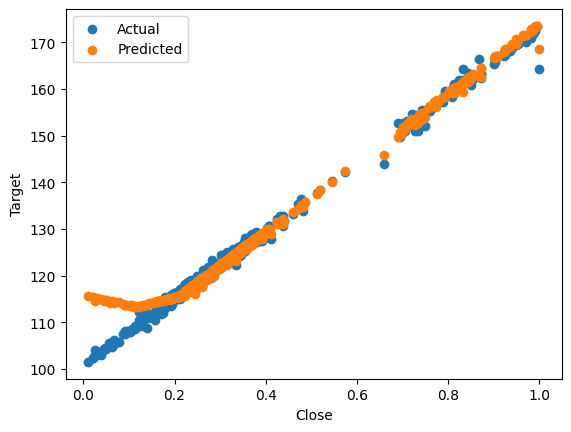

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import numpy as np

X = d_selected[['Open', 'High', 'Low']].values
Y = d_selected['target'].values.reshape(-1, 1)

feature_scaler = MinMaxScaler()
X_scaled = feature_scaler.fit_transform(X)

target_scaler = MinMaxScaler()
Y_scaled = target_scaler.fit_transform(Y)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, Y_scaled, test_size=0.3, random_state=1)

from sklearn.neural_network import MLPRegressor

layer_config = (5,)
model = MLPRegressor(hidden_layer_sizes=layer_config, max_iter=10000, random_state=1)
model.fit(X_train, y_train.ravel())

predictions_train_scaled = model.predict(X_train)
predictions_test_scaled = model.predict(X_test)

predictions_train_denormalized = target_scaler.inverse_transform(predictions_train_scaled.reshape(-1, 1))
predictions_test_denormalized = target_scaler.inverse_transform(predictions_test_scaled.reshape(-1, 1))

print(f"Number of Layers: {model.n_layers_}")
print(f"Number of Neurons: {model.hidden_layer_sizes[0]}")
print(f"Number of Iterations: {model.n_iter_}")
print(f"Training R2 Score: {model.score(X_train, y_train)}")
print(f"Test R2 Score: {model.score(X_test, y_test)}")
print(f'MSE: {mse}')

plt.scatter(X_test[:, 0], target_scaler.inverse_transform(y_test)[:, 0], label="Actual")
plt.scatter(X_test[:, 0], predictions_test_denormalized[:, 0], label="Predicted")
plt.xlabel('Close')
plt.ylabel('Target')
plt.legend()
plt.show()

### **FUNGSI REGULARISASI**

Number of Layers: 3
Number of Neurons: 5
Number of Iterations: 217
Training R2 Score: 0.8301139641431966
Test R2 Score: 0.828946690290341
MSE: 0.176157900685689


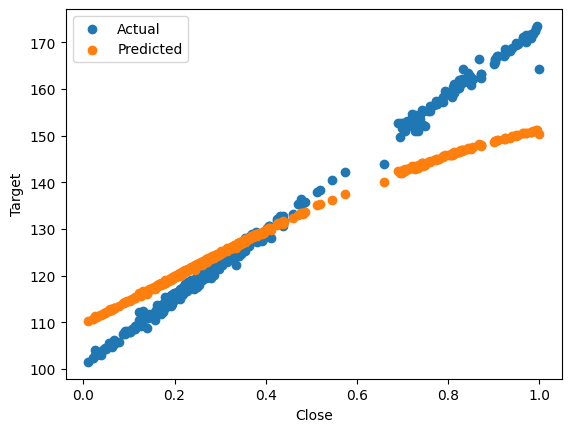

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import numpy as np
from sklearn.neural_network import MLPRegressor

X = d_selected[['Open', 'High', 'Low']].values
Y = d_selected['target'].values.reshape(-1, 1)

feature_scaler = MinMaxScaler()
X_scaled = feature_scaler.fit_transform(X)

target_scaler = MinMaxScaler()
Y_scaled = target_scaler.fit_transform(Y)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, Y_scaled, test_size=0.3, random_state=1)

from sklearn.neural_network import MLPRegressor

layer_config = (5,)


# PENAMBAHAN FUNGSI
model = MLPRegressor(hidden_layer_sizes=layer_config, max_iter=10000, random_state=1, alpha=0.001, solver='adam', activation='logistic')
model.fit(X_train, y_train.ravel())


predictions_train_scaled = model.predict(X_train)
predictions_test_scaled = model.predict(X_test)

predictions_train_denormalized = target_scaler.inverse_transform(predictions_train_scaled.reshape(-1, 1))
predictions_test_denormalized = target_scaler.inverse_transform(predictions_test_scaled.reshape(-1, 1))

print(f"Number of Layers: {model.n_layers_}")
print(f"Number of Neurons: {model.hidden_layer_sizes[0]}")
print(f"Number of Iterations: {model.n_iter_}")
print(f"Training R2 Score: {model.score(X_train, y_train)}")
print(f"Test R2 Score: {model.score(X_test, y_test)}")
print(f'MSE: {mse}')

plt.scatter(X_test[:, 0], target_scaler.inverse_transform(y_test)[:, 0], label="Actual")
plt.scatter(X_test[:, 0], predictions_test_denormalized[:, 0], label="Predicted")
plt.xlabel('Close')
plt.ylabel('Target')
plt.legend()
plt.show()


### **FUNGSI ENCODER**

Epoch 1/50
38/38 [==============================] - 1s 9ms/step - loss: 0.0763 - val_loss: 0.0702
Epoch 2/50
38/38 [==============================] - 0s 4ms/step - loss: 0.0740 - val_loss: 0.0682
Epoch 3/50
38/38 [==============================] - 0s 5ms/step - loss: 0.0721 - val_loss: 0.0664
Epoch 4/50
38/38 [==============================] - 0s 4ms/step - loss: 0.0703 - val_loss: 0.0649
Epoch 5/50
38/38 [==============================] - 0s 4ms/step - loss: 0.0687 - val_loss: 0.0635
Epoch 6/50
38/38 [==============================] - 0s 5ms/step - loss: 0.0673 - val_loss: 0.0623
Epoch 7/50
38/38 [==============================] - 0s 4ms/step - loss: 0.0661 - val_loss: 0.0612
Epoch 8/50
38/38 [==============================] - 0s 4ms/step - loss: 0.0650 - val_loss: 0.0603
Epoch 9/50
38/38 [==============================] - 0s 4ms/step - loss: 0.0641 - val_loss: 0.0595
Epoch 10/50
38/38 [==============================] - 0s 4ms/step - loss: 0.0633 - val_loss: 0.0589
Epoch 11/50
38/38 [

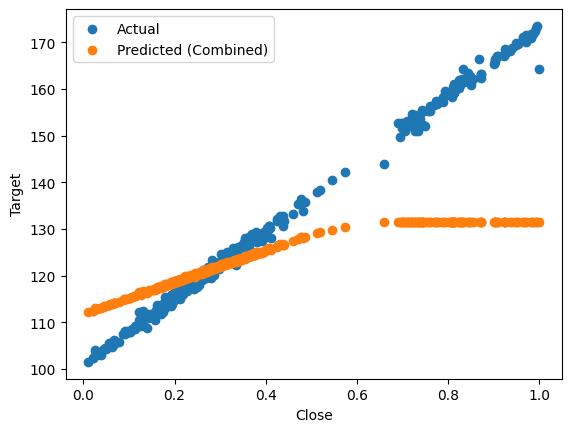

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neural_network import MLPRegressor
import tensorflow as tf
import numpy as np

def build_autoencoder(input_dim, encoding_dim):
    model = tf.keras.models.Sequential([
        tf.keras.layers.Input(shape=(input_dim,)),
        tf.keras.layers.Dense(encoding_dim, activation='relu'),
        tf.keras.layers.Dense(input_dim, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

X = d_selected[['Open', 'High', 'Low']].values
Y = d_selected['target'].values.reshape(-1, 1)

feature_scaler = MinMaxScaler()
X_scaled = feature_scaler.fit_transform(X)

target_scaler = MinMaxScaler()
Y_scaled = target_scaler.fit_transform(Y)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, Y_scaled, test_size=0.3, random_state=1)

input_dim = X_train.shape[1]
encoding_dim = 2
autoencoder = build_autoencoder(input_dim, encoding_dim)
autoencoder.fit(X_train, X_train, epochs=50, batch_size=32, shuffle=True, validation_data=(X_test, X_test))

encoder = tf.keras.models.Model(autoencoder.input, autoencoder.layers[1].output)
X_train_encoded = encoder.predict(X_train)
X_test_encoded = encoder.predict(X_test)

X_train_combined = np.concatenate((X_train, X_train_encoded), axis=1)
X_test_combined = np.concatenate((X_test, X_test_encoded), axis=1)

layer_config_combined = (5 + encoding_dim,)
model_combined = MLPRegressor(hidden_layer_sizes=layer_config_combined, max_iter=10000, random_state=1)
model_combined.fit(X_train_combined, y_train.ravel())

predictions_train_combined = model_combined.predict(X_train_combined)
predictions_test_combined = model_combined.predict(X_test_combined)

predictions_train_denormalized_combined = target_scaler.inverse_transform(predictions_train_combined.reshape(-1, 1))
predictions_test_denormalized_combined = target_scaler.inverse_transform(predictions_test_combined.reshape(-1, 1))

print(f"Number of Layers (Combined): {model_combined.n_layers_}")
print(f"Number of Neurons (Combined): {model_combined.hidden_layer_sizes[0]}")
print(f"Number of Iterations (Combined): {model_combined.n_iter_}")
print(f"Training R2 Score (Combined): {model_combined.score(X_train_combined, y_train)}")
print(f"Test R2 Score (Combined): {model_combined.score(X_test_combined, y_test)}")
print(f'MSE: {mse}')

plt.scatter(X_test[:, 0], target_scaler.inverse_transform(y_test)[:, 0], label="Actual")
plt.scatter(X_test[:, 0], predictions_test_denormalized_combined[:, 0], label="Predicted (Combined)")
plt.xlabel('Close')
plt.ylabel('Target')
plt.legend()
plt.show()
